In [146]:
pip install dmba

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from dmba import classificationSummary
from sklearn.metrics import classification_report


In [148]:
# Data Loading
data = pd.read_csv("/content/sample_data/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [149]:
# Data Cleaning and preprocessing
# Drop ID column
data.drop(columns=['id'], inplace=True)

# Check columns with NA
na_cols = data.columns[data.isna().any()].tolist()
# print(na_cols)

# Get BMI per gender
mean_bmi_per_gender = data.groupby('gender')['bmi'].mean()
# print(mean_bmi_per_gender)

# Replace NA in BMI with the mean for each gender
data.loc[(data['gender'] == 'Female') & (data['bmi'].isna()), 'bmi'] = mean_bmi_per_gender['Female']
data.loc[(data['gender'] == 'Male') & (data['bmi'].isna()), 'bmi'] = mean_bmi_per_gender['Male']
data.loc[(data['gender'] == 'Other') & (data['bmi'].isna()), 'bmi'] = mean_bmi_per_gender['Other']

Text(0, 0.5, 'Count')

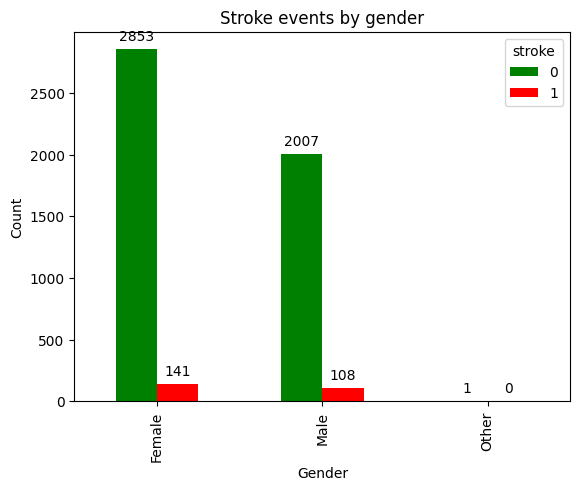

In [150]:
# Exploratory Data Analysis
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack(fill_value=0)
ax = gender_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')

plt.title("Stroke events by gender")
plt.xlabel("Gender")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

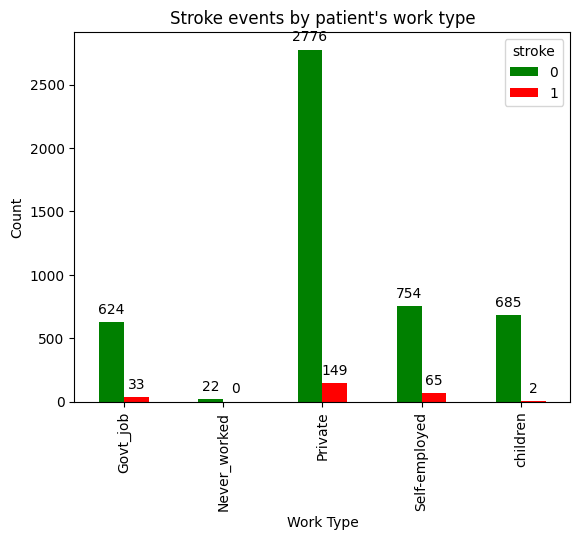

In [151]:
work_type_stroke_counts = data.groupby(['work_type', 'stroke']).size().unstack(fill_value=0)
ax = work_type_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')

plt.title("Stroke events by patient's work type")
plt.xlabel("Work Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

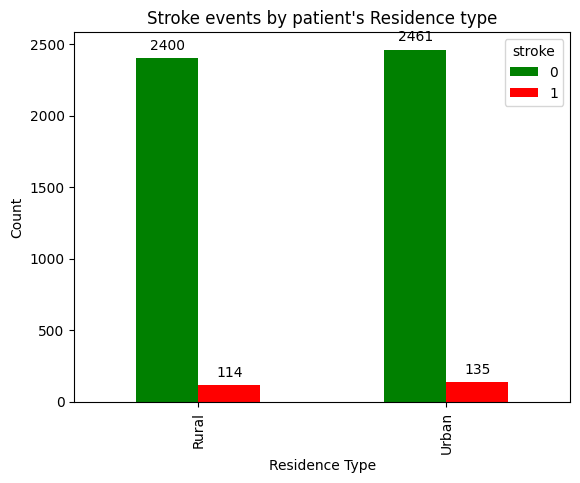

In [152]:
residence_type_stroke_counts = data.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0)
ax = residence_type_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')

plt.title("Stroke events by patient's Residence type")
plt.xlabel("Residence Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

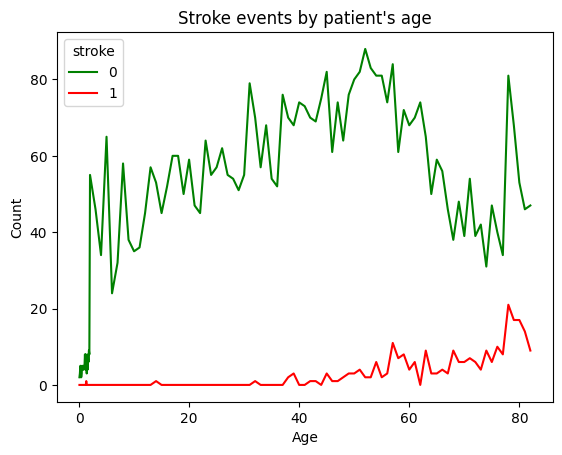

In [153]:
age_stroke_counts = data.groupby(['age', 'stroke']).size().unstack(fill_value=0)
ax = age_stroke_counts.plot(kind='line', color=['green','red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')
plt.title("Stroke events by patient's age")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

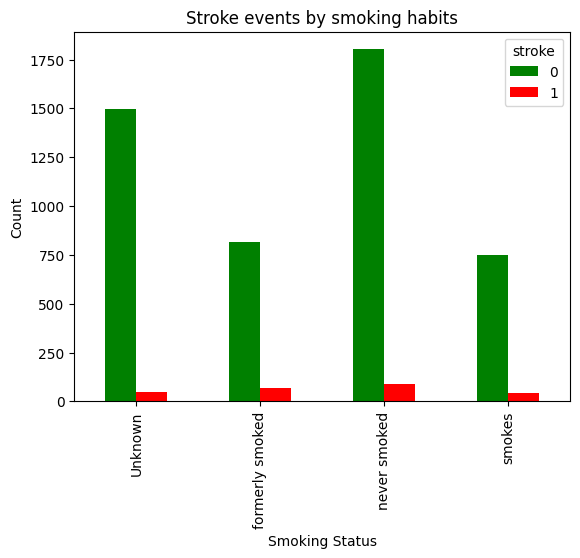

In [154]:
smoking_status_stroke_counts = data.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)
smoking_status_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title("Stroke events by smoking habits")
plt.xlabel("Smoking Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

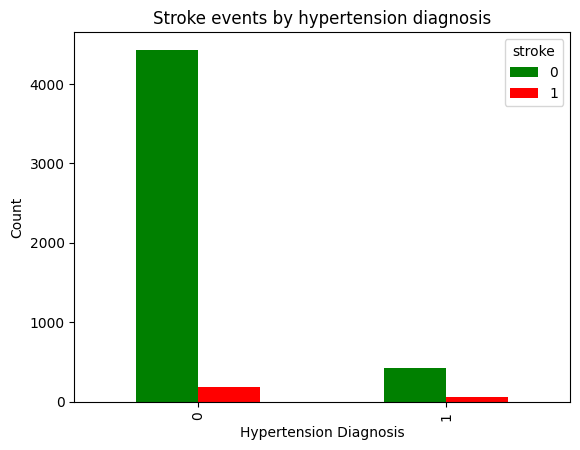

In [155]:
hypertension_stroke_counts = data.groupby(['hypertension', 'stroke']).size().unstack(fill_value=0)
hypertension_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title("Stroke events by hypertension diagnosis")
plt.xlabel("Hypertension Diagnosis")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

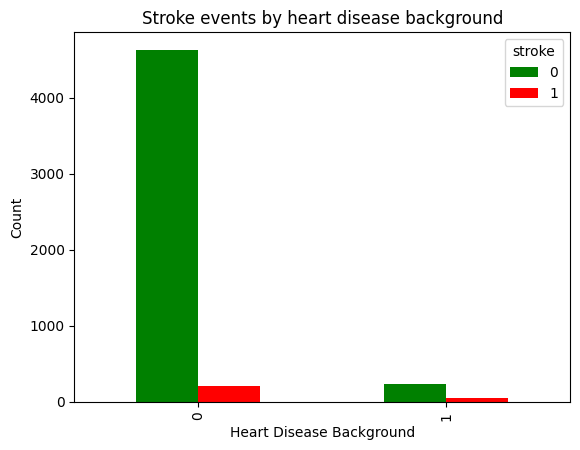

In [156]:
heart_disease_stroke_counts = data.groupby(['heart_disease', 'stroke']).size().unstack(fill_value=0)
heart_disease_stroke_counts.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title("Stroke events by heart disease background")
plt.xlabel("Heart Disease Background")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

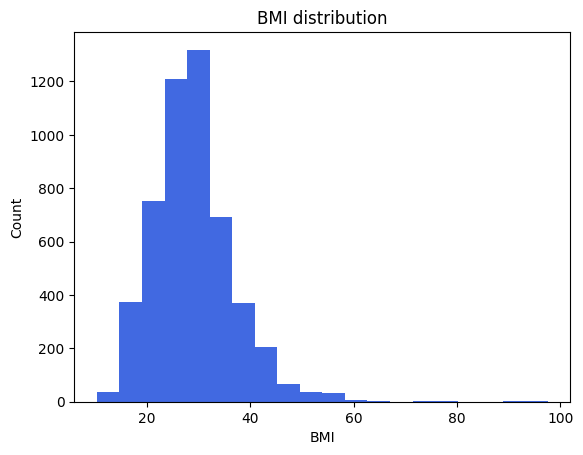

In [157]:
plt.hist(data['bmi'], bins=20, color='royalblue')

plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

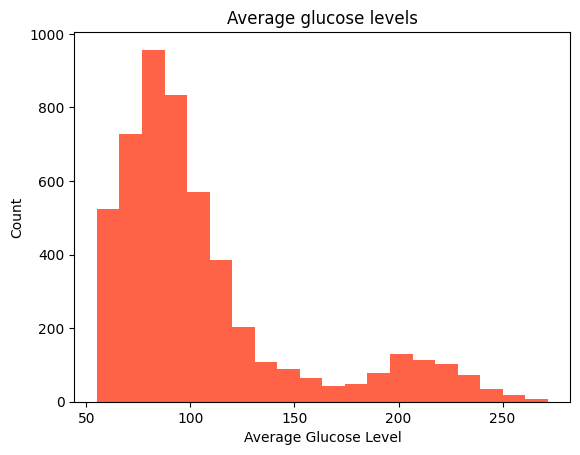

In [158]:
plt.hist(data['avg_glucose_level'], bins=20, color='tomato')
plt.title("Average glucose levels")
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")

In [159]:
# Standardize numeric features
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])
data['bmi'] = scaler.fit_transform(data[['bmi']])
data['avg_glucose_level'] = scaler.fit_transform(data[['avg_glucose_level']])


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001442,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.022636,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.468793,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.715631,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.635478,never smoked,1


In [160]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_predictors = data.drop(columns=['stroke'])
df_dummies = pd.get_dummies(data_predictors, columns=categorical_columns)
# print(df_dummies.head())

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1203)

In [162]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)



In [181]:
# Random Forest
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_

# Train a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report (Positive Class):\n", classification_report(y_test, y_pred, labels=[1]))

#Classification summary
print("Classification summary before changing probaility of predition:\n")
classificationSummary(y_test, y_pred)

y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set a lower threshold for positive predictions)
y_pred_adjusted = (y_prob > 0.1).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report after adjusting probability of classification (Positive Class):\n", classification_report(y_test, y_pred_adjusted, labels=[1]))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(classificationSummary(y_test, y_pred_adjusted))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       987
           1       0.00      0.00      0.00        35

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022

Classification Report (Positive Class):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        35

   micro avg       0.00      0.00      0.00        35
   macro avg       0.00      0.00      0.00        35
weighted avg       0.00      0.00      0.00        35

Classification summary before changing probaility of predition:

Confusion Matrix (Accuracy 0.9569)

       Prediction
Actual   0   1
     0 978   9
     1  35   0
Classification Report after adjusting probability of classification (Positive Class):
               precision    recall  f1-score   support

           1       0.10      

In [182]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train an XGBoost classifier with the best hyperparameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model with respect to the positive class
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report (Positive Class):\n", classification_report(y_test, y_pred, labels=[1]))

#Classification summary
print("Classification summary before changing probaility of predition:\n")
classificationSummary(y_test, y_pred)

y_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set a lower threshold for positive predictions)
y_pred_adjusted = (y_prob > 0.2).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report after adjusting probability of classification [POSITIVE CLASS]:\n", classification_report(y_test, y_pred_adjusted, labels=[1]))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(classificationSummary(y_test, y_pred_adjusted))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       987
           1       0.15      0.37      0.21        35

    accuracy                           0.91      1022
   macro avg       0.56      0.65      0.58      1022
weighted avg       0.95      0.91      0.92      1022

Classification Report (Positive Class):
               precision    recall  f1-score   support

           1       0.15      0.37      0.21        35

   micro avg       0.15      0.37      0.21        35
   macro avg       0.15      0.37      0.21        35
weighted avg       0.15      0.37      0.21        35

Classification summary before changing probaility of predition:

Confusion Matrix (Accuracy 0.9061)

       Prediction
Actual   0   1
     0 913  74
     1  22  13
Classification Report after adjusting probability of classification [POSITIVE CLASS]:
               precision    recall  f1-score   support

           1       0.11      

In [183]:
# k-Nearest Neighbors
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust as needed
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the model with respect to the positive class
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report (Positive Class):\n", classification_report(y_test, y_pred, labels=[1]))

#Classification summary
print("Classification summary before changing probaility of predition:\n")
classificationSummary(y_test, y_pred)

y_prob = best_knn_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set a lower threshold for positive predictions)
y_pred_adjusted = (y_prob > 0.3).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report after adjusting probability of classification [POSITIVE CLASS]:\n", classification_report(y_test, y_pred_adjusted, labels=[1]))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(classificationSummary(y_test, y_pred_adjusted))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       987
           1       0.07      0.17      0.10        35

    accuracy                           0.89      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.94      0.89      0.91      1022

Classification Report (Positive Class):
               precision    recall  f1-score   support

           1       0.07      0.17      0.10        35

   micro avg       0.07      0.17      0.10        35
   macro avg       0.07      0.17      0.10        35
weighted avg       0.07      0.17      0.10        35

Classification summary before changing probaility of predition:

Confusion Matrix (Accuracy 0.8914)

       Prediction
Actual   0   1
     0 905  82
     1  29   6
Classification Report after adjusting probability of classification [POSITIVE CLASS]:
               precision    recall  f1-score   support

           1       0.06      

In [184]:
# Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_classifier, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Logistic Regression classifier with the best hyperparameters
best_logreg_classifier = LogisticRegression(**best_params, random_state=42)
best_logreg_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_logreg_classifier.predict(X_test)


# Evaluate the model with respect to the positive class
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Classification Report [POSITIVE CLASS]:\n", classification_report(y_test, y_pred_adjusted, labels=[1]))

#Classification summary
print("Classification summary before changing probaility of predition:\n")
classificationSummary(y_test, y_pred)

# Make predictions on the test set
y_prob = best_logreg_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set a lower threshold for positive predictions)
threshold = 0.5
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report after adjusting probability of classification [POSITIVE CLASS]:\n", classification_report(y_test, y_pred_adjusted, labels=[1]))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(classificationSummary(y_test, y_pred_adjusted))

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       987
           1       0.10      0.83      0.17        35

    accuracy                           0.73      1022
   macro avg       0.54      0.78      0.51      1022
weighted avg       0.96      0.73      0.82      1022

Classification Report [POSITIVE CLASS]:
               precision    recall  f1-score   support

           1       0.06      0.23      0.10        35

   micro avg       0.06      0.23      0.10        35
   macro avg       0.06      0.23      0.10        35
weighted avg       0.06      0.23      0.10        35

Classification summary before changing probaility of predition:

Confusion Matrix (Accuracy 0.7309)

       Prediction
Actual   0   1
     0 718 269
     1   6  29
Classification Report after adjusting probability of classification [POSITIVE CLASS]:
               precision    recall  f1-score   support

           1       0.10     

In [185]:
# Neural Networks
nn_classifier = MLPClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(nn_classifier, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Neural Network classifier with the best hyperparameters
best_nn_classifier = MLPClassifier(**best_params, random_state=42)
best_nn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_nn_classifier.predict(X_test)

# Evaluate the model with respect to the positive class
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report (Positive Class):\n", classification_report(y_test, y_pred, labels=[1]))

#Classification summary
print("Classification summary before changing probaility of predition:\n")
classificationSummary(y_test, y_pred)

# Make predictions on the test set
y_prob = best_nn_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set a lower threshold for positive predictions)
threshold = 0.2
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report after adjusting probability of classification [POSITIVE CLASS]:\n", classification_report(y_test, y_pred_adjusted, labels=[1]))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(classificationSummary(y_test, y_pred_adjusted))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       987
           1       0.09      0.20      0.13        35

    accuracy                           0.91      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.94      0.91      0.92      1022

Classification Report (Positive Class):
               precision    recall  f1-score   support

           1       0.09      0.20      0.13        35

   micro avg       0.09      0.20      0.13        35
   macro avg       0.09      0.20      0.13        35
weighted avg       0.09      0.20      0.13        35

Classification summary before changing probaility of predition:

Confusion Matrix (Accuracy 0.9070)

       Prediction
Actual   0   1
     0 920  67
     1  28   7
Classification Report after adjusting probability of classification [POSITIVE CLASS]:
               precision    recall  f1-score   support

           1       0.08      

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
